In [1]:
import tensorflow as tf
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
sess = tf.Session(config=config)

#from keras import backend as K
import keras.backend.tensorflow_backend as K
K.set_session(sess)

Using TensorFlow backend.


In [3]:
import os, shutil

original_dataset_dir = '/data/dogs-vs-cats/train'
base_dir = '/data/dogs-vs-cats-clean'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# check number of files
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**Listing 5.5: Instantiating a small convnet for dogs vs. cats classification**

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

**Listing 5.6 Configuring the model for training**

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

**Listing 5.7 Using ImageDataGenerator to read images from directories**

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20, # was 20
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20, # was 20
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**Listing 5.8 Fitting the model using a batch generator**

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6914 - acc: 0.5310 - val_loss: 0.6773 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 15s 148ms/step - loss: 0.6622 - acc: 0.5965 - val_loss: 0.6383 - val_acc: 0.6530
Epoch 3/30
100/100 [==============================] - 17s 169ms/step - loss: 0.6136 - acc: 0.6655 - val_loss: 0.6048 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 17s 167ms/step - loss: 0.5693 - acc: 0.7005 - val_loss: 0.5962 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 15s 150ms/step - loss: 0.5424 - acc: 0.7085 - val_loss: 0.5823 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 15s 145ms/step - loss: 0.5121 - acc: 0.7410 - val_loss: 0.5837 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 17s 171ms/step - loss: 0.4863 - acc: 0.7580 - val_loss: 0.5601 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 1

**Listing 5.9 Saving the model**

In [8]:
model.save('cats_and_dogs_small_1.h5')

**Listing 5.10 Displaying curves of loss and accuracy during training**

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

**Listing 5.11 Setting up data augmentation configuration via ImageDataGenerator**

In [10]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

**Listing 5.12 Displaying some randomly augmented training images**

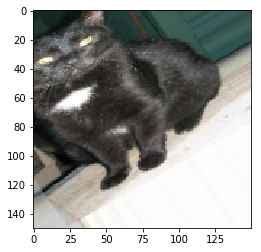

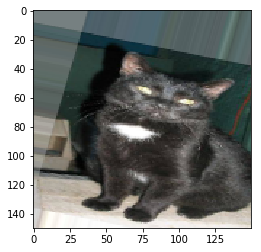

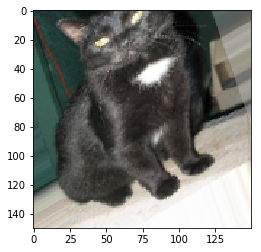

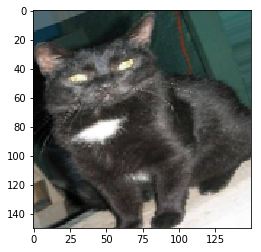

In [11]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  # choose one image to augment

img = image.load_img(img_path, target_size=(150, 150)) # read and resize image

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

**Listing 5.13 Defining a new convnet that includes dropout**

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

**Listing 5.14 Training the convnet using data-augmentation generators**

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255) # validation data should not be augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 35s 351ms/step - loss: 0.6914 - acc: 0.5244 - val_loss: 0.6966 - val_acc: 0.4911
Epoch 2/100
100/100 [==============================] - 36s 357ms/step - loss: 0.6819 - acc: 0.5456 - val_loss: 0.6627 - val_acc: 0.5979
Epoch 3/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6681 - acc: 0.5778 - val_loss: 0.6444 - val_acc: 0.6218
Epoch 4/100
100/100 [==============================] - 37s 372ms/step - loss: 0.6509 - acc: 0.6131 - val_loss: 0.6276 - val_acc: 0.6263
Epoch 5/100
100/100 [==============================] - 34s 340ms/step - loss: 0.6399 - acc: 0.6169 - val_loss: 0.6114 - val_acc: 0.6472
Epoch 6/100
100/100 [==============================] - 37s 367ms/step - loss: 0.6280 - acc: 0.6316 - val_loss: 0.5968 - val_acc: 0.6746
Epoch 7/100
100/100 [==============================] - 31s 314ms/step - loss: 0.6048 - acc: 0.6666 -

**Listing 5.15 Saving the model**

In [14]:
model.save('cats_and_dogs_small_2.h5')

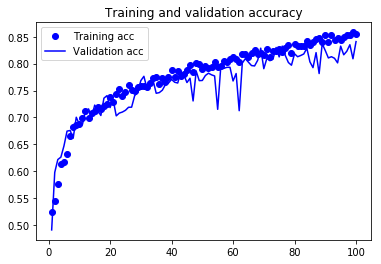

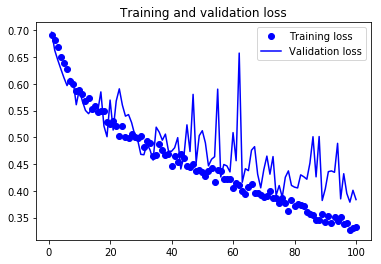

In [15]:
# plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Listing 5.16 Instantiating the VGG16 convolutional base**

In [16]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 32s 1us/step


In [17]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**Listing 5.17 Extracting features using the pretrained convolutional base**

In [22]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/data/dogs-vs-cats-clean'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Reshape features to the right size**

In [24]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

**Listing 5.18 Defining and training the densely connected classifier**

In [25]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 369us/step - loss: 0.6250 - acc: 0.6585 - val_loss: 0.4489 - val_acc: 0.8390
Epoch 2/30
2000/2000 [==============================] - 0s 191us/step - loss: 0.4376 - acc: 0.8010 - val_loss: 0.3627 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 0s 192us/step - loss: 0.3633 - acc: 0.8465 - val_loss: 0.3232 - val_acc: 0.8830
Epoch 4/30
2000/2000 [==============================] - 0s 191us/step - loss: 0.3096 - acc: 0.8805 - val_loss: 0.3008 - val_acc: 0.8770
Epoch 5/30
2000/2000 [==============================] - 0s 190us/step - loss: 0.2874 - acc: 0.8845 - val_loss: 0.2841 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 0s 188us/step - loss: 0.2600 - acc: 0.9020 - val_loss: 0.2729 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 0s 189us/step - loss: 0.2450 - acc: 0.9075 - val_loss: 0.2634 - val_acc: 0.8880


**Listing 5.19 Plotting the results**

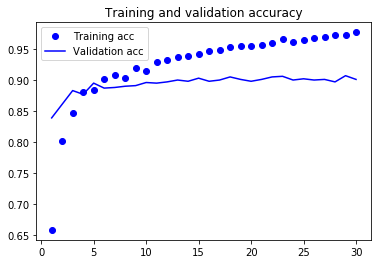

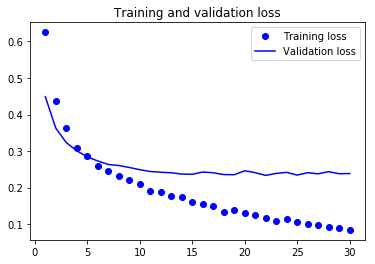

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Listing 5.20 Adding a densely connected classifier on top of the convolutional base**

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Listing 5.21 Training the model end to end with a frozen convolutional base**

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 25s 252ms/step - loss: 0.4851 - acc: 0.7415 - val_loss: 0.3491 - val_acc: 0.8610
Epoch 2/30
100/100 [==============================] - 23s 232ms/step - loss: 0.2677 - acc: 0.8915 - val_loss: 0.1575 - val_acc: 0.9220
Epoch 3/30
100/100 [==============================] - 22s 217ms/step - loss: 0.2377 - acc: 0.9005 - val_loss: 0.1395 - val_acc: 0.9460
Epoch 4/30
100/100 [==============================] - 22s 215ms/step - loss: 0.1835 - acc: 0.9255 - val_loss: 0.1547 - val_acc: 0.9370
Epoch 5/30
100/100 [==============================] - 24s 238ms/step - loss: 0.1488 - acc: 0.9375 - val_loss: 0.1049 - val_acc: 0.9580
Epoch 6/30
100/100 [==============================] - 22s 217ms/step - loss: 0.1300 - acc: 0.9450 - val_loss: 0.1387 - val_acc: 0.9460
Epoch 7/30
100/100 [==============================] - 23s 229ms/step - loss: 0.1093 - acc: 0.9650 - val_lo

**Listing 5.22 Freezing all layers up to a specific one**

In [29]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

**Listing 5.23 Fine-tuning the model**

In [30]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 26s 256ms/step - loss: 0.0172 - acc: 0.9930 - val_loss: 0.1353 - val_acc: 0.9690
Epoch 2/100
100/100 [==============================] - 23s 229ms/step - loss: 0.0140 - acc: 0.9960 - val_loss: 0.1547 - val_acc: 0.9670
Epoch 3/100
100/100 [==============================] - 21s 213ms/step - loss: 0.0182 - acc: 0.9945 - val_loss: 0.1317 - val_acc: 0.9720
Epoch 4/100
100/100 [==============================] - 22s 215ms/step - loss: 0.0125 - acc: 0.9970 - val_loss: 0.1308 - val_acc: 0.9680
Epoch 5/100
100/100 [==============================] - 22s 217ms/step - loss: 0.0118 - acc: 0.9955 - val_loss: 0.1460 - val_acc: 0.9710
Epoch 6/100
100/100 [==============================] - 22s 215ms/step - loss: 0.0108 - acc: 0.9970 - val_loss: 0.1352 - val_acc: 0.9770
Epoch 7/100
100/100 [==============================] - 23s 230ms/step - loss: 0.0048 - acc: 0.9985 - val_loss: 0.1561 - val_acc: 0.9700
Epoch 8/100
100/100 [===========================

**Save the fine-tuned model**

In [31]:
model.save('cats_and_dogs_finetuned.h5')

**Listing 5.24 Smoothing the plots**

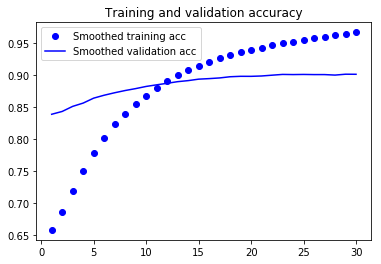

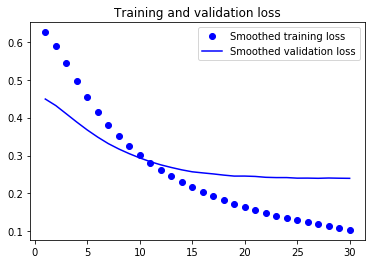

In [32]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
    smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
    smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
    smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
    smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Evaluate Test Accuracy**

In [33]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9679999935626984


## Visualizing the learned features

**Load a trained Model**

In [33]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

**Listing 5.25 Preprocessing a single image**

In [34]:
img_path = '/data/dogs-vs-cats-clean/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


**Listing 5.26 Displaying the test picture**

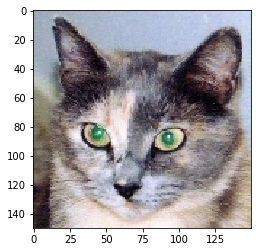

In [35]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

**Listing 5.27 Instantiating a model from an input tensor and a list of output tensors**

In [36]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

**Listing 5.28 Running the model in predict mode**

In [37]:
activations = activation_model.predict(img_tensor)

**first layer activation**

In [38]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


**Listing 5.29 Visualizing the fourth channel**

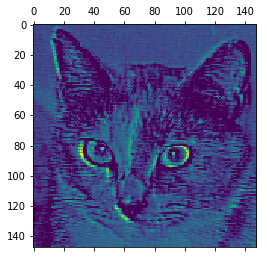

In [39]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

**Listing 5.30 Visualizing the seventh channel**

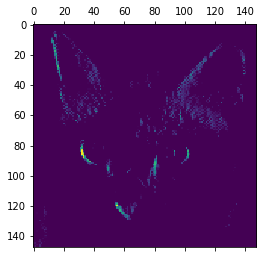

In [40]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

**Listing 5.31 Visualizing every channel in every intermediate activation**

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


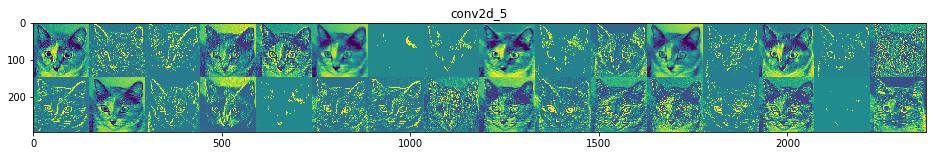

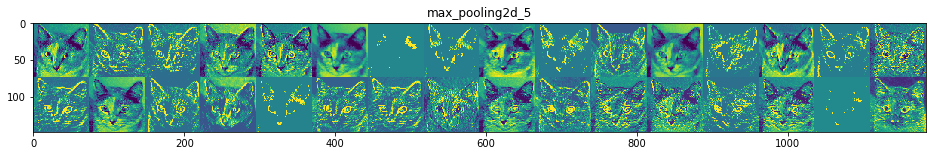

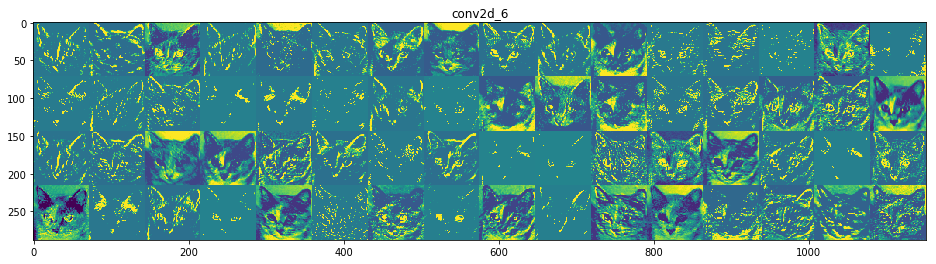

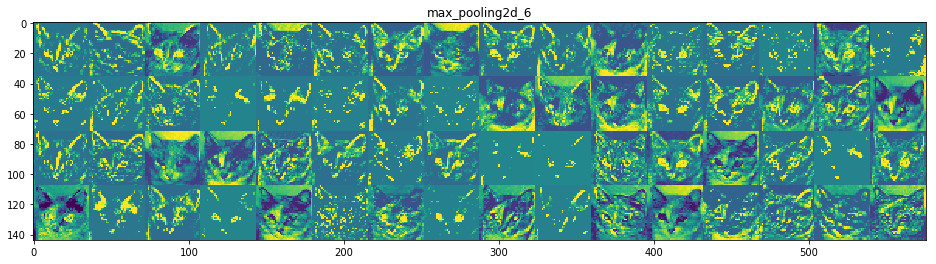

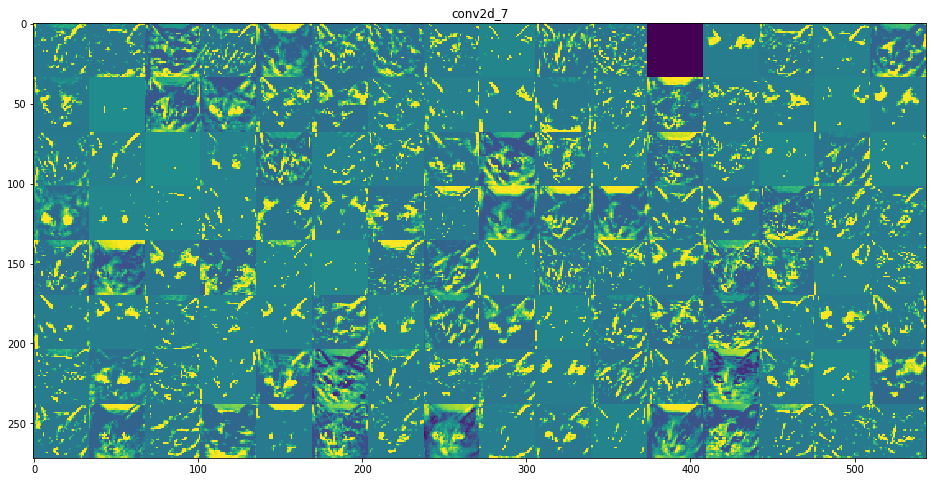

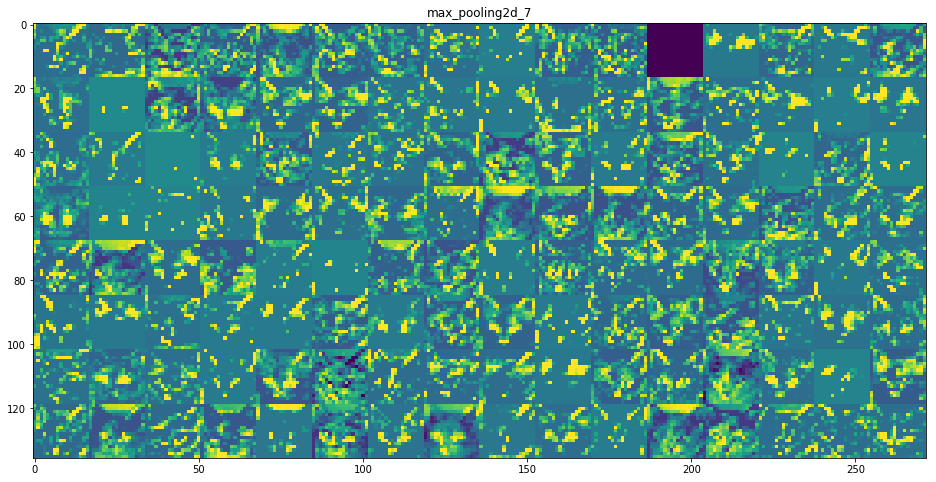

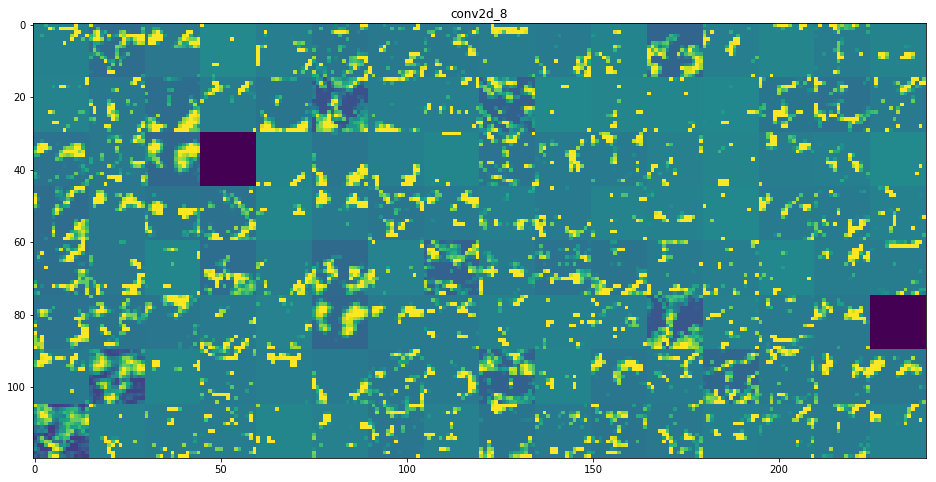

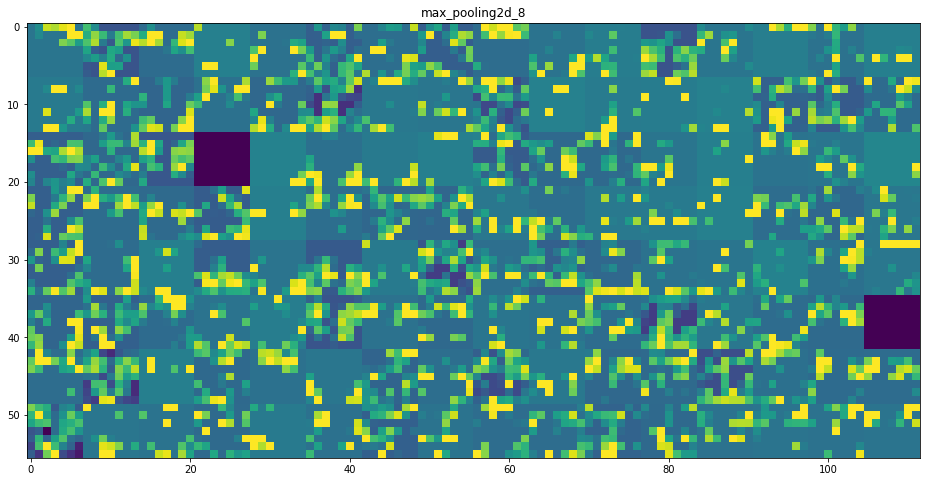

In [41]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                :, :,
                col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Listing 5.32 Defining the loss tensor for filter visualization**

In [42]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
    include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

**Listing 5.33 Obtaining the gradient of the loss with regard to the input**

In [43]:
grads = K.gradients(loss, model.input)[0] # The call to gradients returns a list of tensors (of size 1 in this case). Hence, you keep only the first element—which is a tensor. mmw

**Listing 5.34 Gradient-normalization trick**

In [44]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Add 1e–5 before dividing to avoid accidentally dividing by 0.

**Listing 5.35 Fetching Numpy output values given Numpy input values**

In [45]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

**Listing 5.36 Loss maximization via stochastic gradient descent**

In [46]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])

    input_img_data += grads_value * step

**Listing 5.37 Utility function to convert a tensor into a valid image**

In [47]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

**Listing 5.38 Function to generate filter visualizations**

In [48]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

**Example zeroth channel block3_conv1 maximum response pattern**

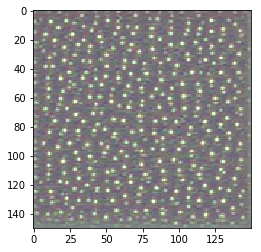

In [49]:
plt.imshow(generate_pattern('block3_conv1', 0))

**Listing 5.39 Generating a grid of all filter response patterns in a layer**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


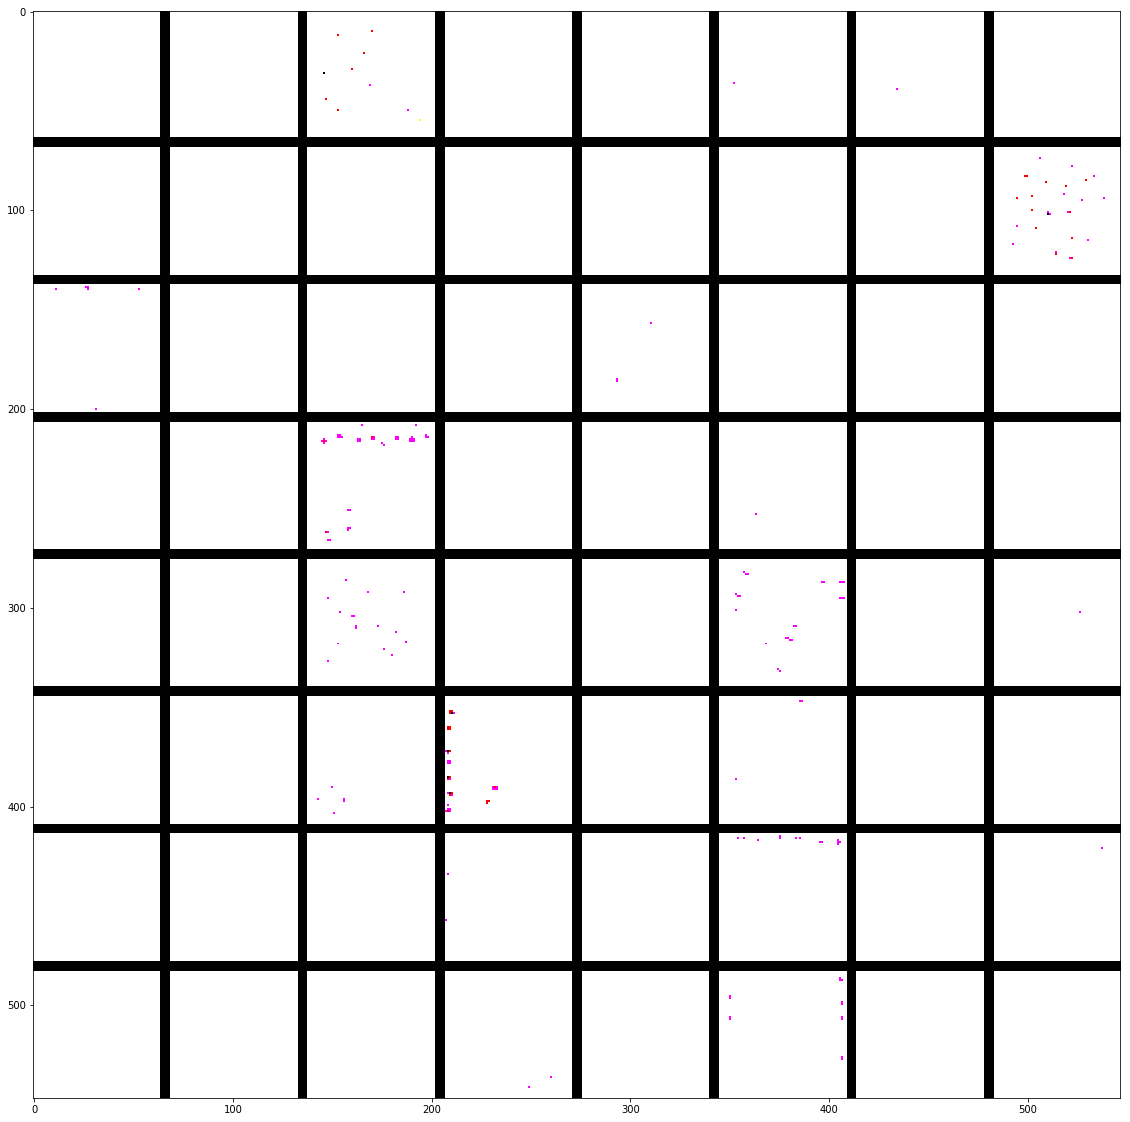

In [50]:
layer_name = 'block3_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)

**Listing 5.40 Loading the VGG16 network with pretrained weights**

In [51]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

**Listing 5.41 Preprocessing an input image for VGG16**

In [52]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/data/creative_commons_elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

**Predict and decode predictions**

In [53]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.42472124), ('n02504458', 'African_elephant', 0.3589989), ('n01871265', 'tusker', 0.15682185)]


**Maximum activation at index**

In [54]:
np.argmax(preds[0])

385

**Listing 5.42 Setting up the Grad-CAM algorithm**

In [55]:
african_elephant_output = model.output[:, 385]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

**Listing 5.43 Heatmap post-processing**

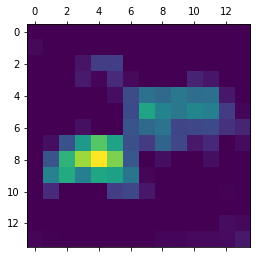

In [56]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

**Listing 5.44 Superimposing the heatmap with the original picture**

In [57]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('/data/elephant_cam.jpg', superimposed_img)

True